# Python Skills Upgrade:  Argument unpacking, Decorators, Inheritance
New Python syntax / concepts.
This example notebook will be available on Github from the powderflask/cap-comp215 repository.
As usual, the first code block just imports the modules we will use.

In [157]:
import math, time

import matplotlib.pyplot as plt

## New Python Syntax: dictionary constructor
Often constructing a dictionary using keyword arguments makes for more readable code...

In [158]:
d1 = {
    'a' : 1,
    'b' : 2,
    'c' : 3,
}
# vs.
d2 = dict(a=1, b=2, c=3)   # only works if dictionary keys are valid python identifiers.

assert d1 == d2

d1, d2

({'a': 1, 'b': 2, 'c': 3}, {'a': 1, 'b': 2, 'c': 3})

## New Python Syntax: argument unpacking

In [159]:
def print_args(*args, **kwargs):
    print(f'positional args is a {type(args)}: {args}')
    print(f'keyword args is a {type(kwargs)}: {kwargs}')

print_args(42, 'hello', foo=True, bar=[1,2,3])

positional args is a <class 'tuple'>: (42, 'hello')
keyword args is a <class 'dict'>: {'foo': True, 'bar': [1, 2, 3]}


### Unpacking a dictionary or tuple to pass a collection of arguments

In [160]:
a = ("cool", 'numbers')
d = dict(phi=1.618033988749, pi=math.pi, h=6.62607015e-34)

print_args(*a, **d)

positional args is a <class 'tuple'>: ('cool', 'numbers')
keyword args is a <class 'dict'>: {'phi': 1.618033988749, 'pi': 3.141592653589793, 'h': 6.62607015e-34}


#### Using unpack to merge dictionaries

In [161]:
d3 = dict(a=1, b=2, c=3)
d4 = dict(c=4, d=5, e=6)  # note also contains key 'c'

{**d3, **d4}

{'a': 1, 'b': 2, 'c': 4, 'd': 5, 'e': 6}

#### Argument Unpacking: example
unpacking data dictionary and empirical coefficient values for *Basal Metabolic Rate* (BMR) calculation:

males :   `BMR = 66 + 13.7 * weight (kg) + 5 * height (cm) - 6.8 * age (years)`

female: `BMR = 655 + 9.6 * weight (kg) + 1.8 * height (cm) - 4.7 * age (years)`

In [162]:
people = (
    dict(name='bob', gender='male', weight=70, height=180, age=45),
    dict(name='bei', gender='female', weight=55, height=175, age=35),
    dict(name='kai', gender='male', weight=90, height=210, age=24),
    dict(name='kia', gender='female', weight=60, height=185, age=27),
)

BMR_PARAMS = dict(
    male=(66, 13.7, 5, -6.8),     # 66 + 13.7 * weight (kg) + 5 * height (cm) - 6.8 * age (years)
    female=(655, 9.6, 1.8, -4.7), # 655 + 9.6 * weight (kg) + 1.8 * height (cm) - 4.7 * age (years)
)

def bmr(a, b, c, d, weight, height, age, **kwargs):
    """ Return the BMR for coefficients a,b,c,d and given weight (kg), height (cm) and age (years) """
    return a + b*weight + c*height + d*age

{
    p['name']: bmr(*BMR_PARAMS[p['gender']], **p)   for p in people
}

{'bob': 1619.0, 'bei': 1333.5, 'kai': 2185.8, 'kia': 1437.1}

#### Argument Unpacking: example
unpacking coordinates for line segments in a 7-segment display.

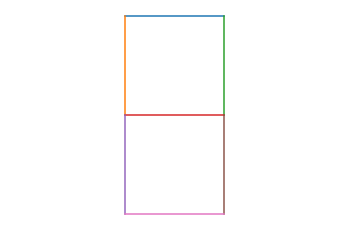

In [163]:
# (start, end) coordinates for each segment on a 3 x 5 grid (0, 0) to (2, 4)
SEGS_COORDS = (
    ((0,4), (2,4)),
    ((0,2), (0,4)),
    ((2,2), (2,4)),
    ((0,2), (2,2)),
    ((0,0), (0,2)),
    ((2,0), (2,2)),
    ((0,0), (2,0)),
)
# Transform coordinate pairs ((x1, y1), (x2, y2)) into ordinate vectors ((x1, x2), (y1, y2)) (for matplotlib)
SEG_ORDS = [zip(*coords) for coords in SEGS_COORDS]
# List of segments needed to display each of 9 digits
SEGMENTS = (
    (0, 1, 2, 4, 5, 6),
    (2, 5),
    (0, 2, 3, 4, 6),
    (0, 2, 3, 5, 6),
    (1, 2, 3, 5),
    (0, 1, 3, 5, 6),
    (1, 3, 4, 5, 6),
    (0, 2, 5),
    (0, 1, 2, 3, 4, 5, 6),
    (0, 1, 2, 3, 5)
)

def seven_seg_display(d):
    """ Plot digit d as a seven segment display """
    assert 0 <= d <= 9
    for seg in SEGMENTS[d]:
        plt.plot(*SEG_ORDS[seg])

N = 8
seven_seg_display(N)
plt.axis('equal')
plt.axis('off')
plt.show()

## Higher-order functions
Functions are "first class citizens"!
 - they are objects and can be treated like any other objects
 - they can be passed as parameters to other functions
 - they can be returned as a function's value

Python's built-in `functools` module provides additional abstractions for working with higher-order functions.

In [164]:
# Example 1: a function that returns another function!
def power(exponent):
    """ A factory that returns the power function for the given exponent """
    def f(n):
        return n**exponent
    return f

square = power(2)
cube = power(3)

assert square(5) == 25
assert cube(3) == 27

print(f'square is a {type(square)}.  square(9)=={square(9)}')

square is a <class 'function'>.  square(9)==81


In [2]:
# Example 2: a function that takes another function as a parameter
def sort(lst, item=lambda record: record):
    """ Sort the list in place with the order determined by the given function """
    # Bubble sort - one of the first sort algorithm most CS students learn.  Pretty inefficient.
    for i in range(len(lst)):
        for j in range(1, len(lst)-i):
            if not item(lst[j-1]) < item(lst[j])):
                lst[j-1], lst[j] = lst[j], lst[j-1]
    return lst

print(f'Numeric sort: {sort([6, 3, 9, 2, 5, 7, 1, 0, 8, 4])}')

people = [
    dict(name='bob', gender='male', weight=70, height=180, age=45),
    dict(name='bei', gender='female', weight=55, height=175, age=35),
    dict(name='kai', gender='male', weight=90, height=210, age=24),
    dict(name='kia', gender='female', weight=60, height=185, age=27),
]
sort(people, item=lambda record: record['age'])

Numeric sort: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


[{'name': 'kai', 'gender': 'male', 'weight': 90, 'height': 210, 'age': 24},
 {'name': 'kia', 'gender': 'female', 'weight': 60, 'height': 185, 'age': 27},
 {'name': 'bei', 'gender': 'female', 'weight': 55, 'height': 175, 'age': 35},
 {'name': 'bob', 'gender': 'male', 'weight': 70, 'height': 180, 'age': 45}]

In [6]:
# Example 3: just for giggles, reduce is a generic accumulator algorithm that "combines" items into a single value.
def reduce(iterable, combine):
    """ Combine all items in the iterable by accumulating them in a running total. """
    generator = iter(iterable)            # this turns any iterable into a generator...
    total = next(generator)               # so we can pull out the first item to "bootstrap" the loop...
    for item in generator:
        total = combine(total, item)      # where we successively accumulate items into the running total
    return total

# Python's built-in sum function is a special case of reduce:
assert sum(range(10)) == reduce(range(10), lambda x, y: x+y)

print(f'Factorial of 10 is {reduce(range(1,11), lambda x, y: x*y)}')

Factorial of 10 is 3628800


#### A reduction factory
The `reduce` function defined above is very generic, but hard to read because it doesn't provide any abstraction for the specific reduction.
Here we "wrap" it in a function factory the returns a specific version of `reduce` for a specific `combine` function.


In [8]:
def reducer(combine):
    """ Return a reduce function usnig the specific combine function given. """
    def reduce(iterable):
        generator = iter(iterable)            # this turns any iterable into a generator...
        total = next(generator)               # so we can pull out the first item to "bootstrap" the loop...
        for item in generator:
            total = combine(total, item)      # where we successively accumulate items into the running total
        return total
    return reduce

# build a reducer similar to python's built-in sum function:
my_sum = reducer(lambda x, y: x+y)

assert sum(range(10)) == my_sum(range(10))

almost_factorial = reducer(lambda x, y: x*y)
N = 10
print(f'Factorial of {N} is {almost_factorial(range(1,N+1))}')

Factorial of 10 is 3628800


## Decorators
A **decorator** is a function that "wraps" another function to provide some extra behaviour.
Here's a minimal example...

In [168]:
def double(f):
    """ return a function that doubles the output of function f """
    def doubler(n):
        return 2*f(n)
    return doubler


def factorial(n):
    """ Return factorial of n -- notice this is a reduce operation! """
    f = n
    while n > 1:
        n -= 1
        f *= n
    return f

assert factorial(5) == 120

double_factorial = double(factorial)

assert double_factorial(5) == 240


#### Decorator Example:  a execution time logging
Imagine we wanted to do some timing tests on some computationally expensive functions…
(Note: there are MUCH more efficient ways to identify prime numbers! These naive algorithms are for illustraion only.)

In [169]:
def performance(f):
    """ Return a function that will execute function f and record the time it takes to execute."""
    def decorator(*args, **kwargs):
        start = time.perf_counter()
        v = f(*args, **kwargs)
        end = time.perf_counter()
        print(f'Performance of {f.__name__}{args}: {end-start} seconds.')
        return v
    return decorator


def is_prime(n):
    """ Return True iff integer n is a prime number """
    assert type(n) is int and n >= 2
    div, upper = 2, math.sqrt(n)
    while div <= upper:
        if n%div == 0:
            return False
        div += 1
    return True

assert is_prime(11)

N = 1246739743737
print(f"{N} is {'' if is_prime(N) else 'not'} prime.")


def find_next_prime(n):
    """ Return the first prime number at least as large as n """
    assert type(n) is int and n >= 1
    while not is_prime(n):
        n += 1
    return n

assert find_next_prime(23+1) == 29

@performance
def nth_prime(n):
    """ Return the n'th prime number """
    assert type(n) is int and n >= 1
    nth = 1
    prime = 2
    while n > nth:
        prime = find_next_prime(prime+1)
        nth += 1
    return prime

assert nth_prime(10) == 29

Nth = 20000
print(f"The {Nth}'th prime number is {nth_prime(Nth)}.")



1246739743737 is not prime.
Performance of nth_prime(10,): 2.141499862773344e-05 seconds.
Performance of nth_prime(20000,): 1.2452000939993013 seconds.
The 20000'th prime number is 224737.


## Class Inheritance
* use with caution - there is **much** to learn about using inheritance correctly!
* always prefer to use **composition** to share code
* see Ch. 19 in Comp115 Think Python textbook for more examples

In [170]:
class Point2D:
    """ A point on the 2D Cartesian plane """
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __str__(self):
        return '({x}, {y})'.format(x=round(self.x,2), y=round(self.y,2))

    def distance(self, other):
        """ Return distance between this point and other Point2D """
        return math.sqrt((self.x-other.x)**2 + (self.y-other.y)**2)

    @property
    def r(self):
        """ length, r, from origin to this point """
        return self.distance(Point2D(0,0))

    @property
    def theta(self):
        """ angle, in radians, of vector to this point """
        return math.atan2(self.y, self.x)  # faster than SohCahToa

    def polar_coord(self):
        """ return the polar coordinate for this point """
        return (self.r, self.theta)


class PolarPoint2D(Point2D):
    """ A point on the 2D Cartesian plane specified in polar coordinates """
    def __init__(self, r, theta):
        """ define point by length r and angle, theta, in radians """
        super().__init__(x=r*math.cos(theta), y=r*math.sin(theta))


class LabelledPoint2D(Point2D):
    """ A labelled point on a 2D Cartesian plane """
    def __init__(self, x, y, label):
        super().__init__(x, y)
        self.label = label

    def __str__(self):
        return '{point}-{label}'.format(point=super().__str__(), label=self.label)


p1 = Point2D(3, 4)
p2 = PolarPoint2D(5, 0.93)
p3 = LabelledPoint2D(6, 8, 'Here')

print('3 different kinds of points:', type(p1), p1, type(p2), p2, type(p3), p3)
print('Polar coordinates: p1:', p1.polar_coord(), ' p2:', p2.polar_coord())
print('Distance from', p1,'to', p2, ':', p1.distance(p2), ' and visa versa:', p2.distance(p1))
print('Distance from', p1, 'to', p3, ':', p1.distance(p3), ' and visa versa:', p3.distance(p1))

3 different kinds of points: <class '__main__.Point2D'> (3, 4) <class '__main__.PolarPoint2D'> (2.99, 4.01) <class '__main__.LabelledPoint2D'> (6, 8)-Here
Polar coordinates: p1: (5.0, 0.9272952180016122)  p2: (5.0, 0.9299999999999999)
Distance from (3, 4) to (2.99, 4.01) : 0.013523905869487528  and visa versa: 0.013523905869487528
Distance from (3, 4) to (6, 8)-Here : 5.0  and visa versa: 5.0
